In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("Cleaned_reduced.csv")

In [3]:
train_size = int(len(df) * 0.7)  # 70% for training
val_size = int(len(df) * 0.15)  # 15% for validation
test_size = len(df) - train_size - val_size  # Remaining 15% for test

In [4]:
# Split the data into train, validation, and test sets
train_data = df[:train_size]
val_data = df[train_size:train_size + val_size]
test_data = df[train_size + val_size:]

In [5]:
# Prepare data for feature selection (using only training data)
X_train_fs = train_data.drop(columns=['Close_NVDA'])
y_train_fs = train_data['Close_NVDA']

In [6]:
X_train_fs_numeric = X_train_fs.select_dtypes(include=['float64', 'int64'])  # Exclude non-numeric columns

In [7]:
# Check if the index (date) is being used incorrectly
if X_train_fs.index.name:
    X_train_fs_numeric = X_train_fs_numeric.reset_index(drop=True)

In [8]:
# Scale the numeric features
scaler = StandardScaler()
X_train_fs_scaled = scaler.fit_transform(X_train_fs_numeric)

In [9]:
# Train a random forest regressor on the scaled training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_fs_scaled, y_train_fs)

RandomForestRegressor(random_state=42)

In [10]:
# Get feature importances
feature_importances = rf.feature_importances_

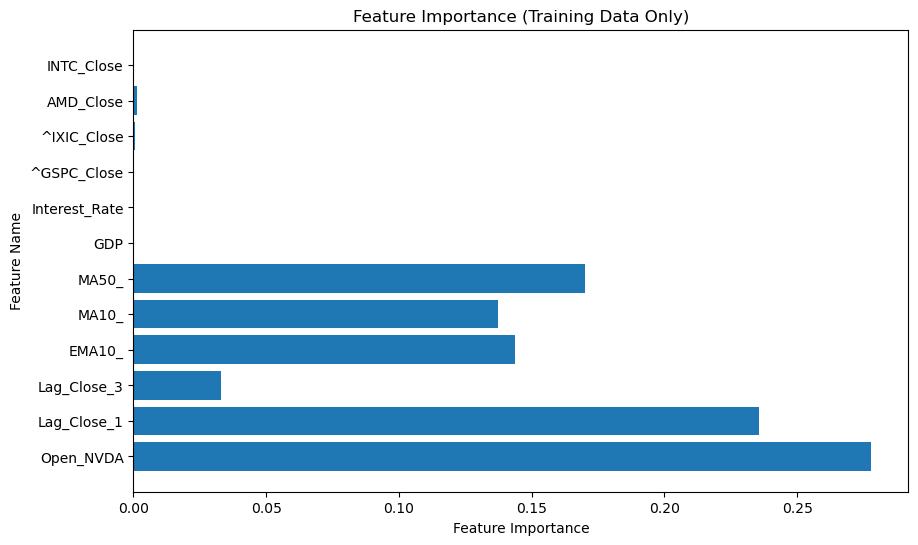

In [11]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train_fs_numeric.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance (Training Data Only)')
plt.show()

In [12]:
# Create a DataFrame of features and their importance for ranking
feature_importance_df = pd.DataFrame({
    'Feature': X_train_fs_numeric.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

In [13]:
feature_importance_df

,Feature,Importance
0,Open_NVDA,0.277964
1,Lag_Close_1,0.235669
5,MA50_,0.170244
3,EMA10_,0.143711
4,MA10_,0.137232
2,Lag_Close_3,0.032806
10,AMD_Close,0.001365
9,^IXIC_Close,0.000712
8,^GSPC_Close,0.000140
11,INTC_Close,0.000135


In [14]:
# Filter features with importance >= 0.01
selected_features = feature_importance_df[feature_importance_df['Importance'] >= 0.01]['Feature'].tolist()

In [15]:
# Create a new DataFrame with selected features and the target column
filtered_df = df[selected_features + ['Close_NVDA']]

In [16]:
filtered_df.to_csv("final_data.csv")